# 100 Points

### Backstory

Doc Trine has been kidnapped by a freelance security analyst, Ove, and
held in some sort of 'hyperjail'. Zenda and Reece need to figure out
where it is and how to get there, using only the janky equipment lying
around the office. Once they've rescued her, maybe Doc Trine will finally
reveal the secret of timbits!

At Trine's desk, they find her notebook, full of diagrams,
calculations, and dense, messy handwriting. Leafing through
them, Zenda and Reece discover a note helpfully explaining
what this hyperjail is: "*A 5-dimensional hypercube, accessed from some
unknown point in deep space. Should get those robots out there some
time.*" Robots? They keep reading: "*Cell number is in the magic
5-ball.*" They root around in the games room and find a dusty old magic
5-ball, which outputs 'yes' and 'no' answers to a 5-bit input.
Presumably (though who knows how) Trine has concealed her location in
this oracle. They have another problem, though. The fault-tolerant
office equipment has disappeared along with Trine, leaving only noisy
old circuitry!

### Noisy Bernstein–Vazirani

The oracle encodes the cell number $c \in \\{0, 1\\}^5$, a $5$-bit string.
Consider the dot product

$$
f(x) = x \cdot c = x_0 c_0 + x_1 c_1 + \cdots + x_5 c_5 \mod 2,
$$

where $x \in \\{0, 1\\}^5$ is an arbitrary $5$-bit string. The oracle is
a unitary operator $U_f$ which encodes the dot product $f$
as a phase:

$$
U_f \vert x\rangle = (-1)^{f(x)} \vert x\rangle.
$$

Zenda and Reece need to use this oracle to learn the starting positions
$c$, but equipment in the old lab is noisy, with *depolarizing noise*,
which with some probability $\lambda$ replaces a qubit state with
something random.
Despite the noise, Zenda and Reece can attempt to learn Doc Trine's
coordinates using the *Bernstein–Vazirani algorithm*.
We picture the noisy circuit below:



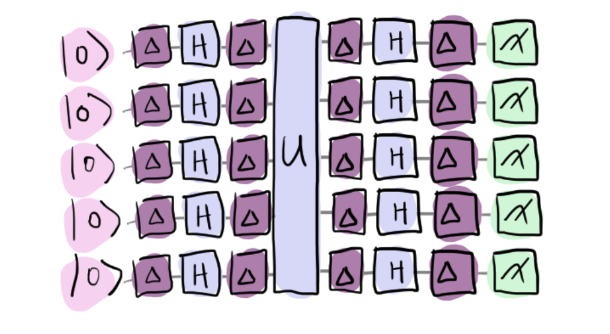


Your goal: implement a noisy version of the Bernstein–Vazirani
algorithm, using the noisy Hadamard gates provided.
Will it work on the old computer?

## Challenge code

In the code below, you are given various functions:
- `oracle_matrix`: which encodes Doc Trine's location in the hypercube.
- `noisy_Hadamard`: which applies a noisy Hadamard gate, with a
	probability `lmbda` of replacing an incoming or outgoing qubit
	state with something random.
-  `noisy_BernsteinVazirani`: which implements the Bernstein-Vazirani
algorithm using the oracle and the noisy Hadamard operation `noisy_Hadamard`. **You must complete this
function**.

You may find this resource helpful:

- [Bernstein-Vazirani algorithm](https://en.wikipedia.org/wiki/Bernstein%E2%80%93Vazirani_algorithm)

### Inputs

The noisy Bernstein-Vazirani circuit `noisy_BernsteinVazirani` takes as input the
probability  `lmbda (float)` of replacing the state of a qubit.

### Output

Your `noisy_BernsteinVazirani` circuit should correctly output the expectation value
of the Pauli-$Z$ operator on each qubit (`[float]`). The pattern of
positive and negative expectations gives the cell number for any value
of $\lambda$, showing that Bernstein–Vazirani is robust to noise.

If your solution matches the correct one within the given tolerance
specified in `check` (in this case it's a `1e-4` relative error
tolerance), the output will be `"Correct!"` Otherwise, you will
receive a `"Wrong answer"` prompt.

## Solution

In [1]:
import json
import pennylane as qml
import pennylane.numpy as np

def noisy_Hadamard(lmbda, wire):
    """A Hadamard gate with depolarizing noise on either side.
    
    Args:
        lmbda (float): The parameter defining the depolarizing channel.
        wire (int): The wire the depolarizing channel acts on.
    """
    qml.DepolarizingChannel(lmbda, wires=wire)
    qml.Hadamard(wire)
    qml.DepolarizingChannel(lmbda, wires=wire)

# Oracle matrix for Doc Trine's cell number

flips = [1, 3, 5, 7, 8, 10, 12, 14, 16, 18, 20, 22, 25, 27, 29, 31]

oracle_matrix = np.eye(2**5)
for i in flips:
    oracle_matrix[i, i] = -1

# Implement the Bernstein-Vazirani algorithm with depolarizing noise

dev = qml.device("default.mixed", wires = 5)
@qml.qnode(dev)
def noisy_BernsteinVazirani(lmbda):
    """Runs the Bernstein-Vazirani algorithm with depolarizing noise.

    Args:
        lmbda (float): The probability of erasing the state of a qubit.

    Returns:
        (list(float)): Expectation values for PauliZ on all n wires.
    """


    # Put your code here #
    for i in range(5):
        noisy_Hadamard(lmbda, i)
    qml.QubitUnitary(oracle_matrix, wires=range(5))
    for i in range(5):
        noisy_Hadamard(lmbda, i)
    
    return [qml.expval(qml.PauliZ(i)) for i in range(5)]
        


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:

    lmbda = json.loads(test_case_input)
    output = noisy_BernsteinVazirani(lmbda).tolist()

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-4
    ), "Your noisy Bernstein-Vazirani algorithm isn't giving the right answers!"


test_cases = [['0.1', '[-0.5641679, -0.5641679,  0.5641679,  0.5641679, -0.5641679]']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '0.1'...
Correct!


# 200 Points

### Backstory

Zenda and Reece have determined Doc Trine's cell number in
 hyperjail.
 Searching through Trine's notebooks, they find another note,
 explaining how the hypercube is patrolled by a fearsome quantum
 warden, which is able to place itself in a superposition and inspect
 multiple cells at once.
To avoid detection and rescue Doc Trine, they need to build a quantum
 radar!

### A quantum radar

The quantum guard can place itself in a superposition

$$
\vert \text{guard}\rangle = \sum_{x} g_x \vert x\rangle,
$$

where $x \in \\{0, 1\\}^5$ ranges over all cell numbers, and $g_x$ are complex-valued amplitudes. Seen in this way, $|g_x|^2$ is the probability that the guard is at position $|x\rangle.$
They know that Doc Trine is located in a cell $c = (1, 1, 0, 0, 1).$
Ideally, they would like to wait until the guard's attention, captured by the probability $|g_c|^2$, is sufficiently low.

In this challenge, we will look for a way to be able to measure $|g_c|^2.$ Unfortunately, there isn't much equipment in the office, and what is there is noisy!
But Trine has left a collection of "Toffoli cascades" lying around, circuits made from a string of noisy Toffoli gates. Here is an example for three input qubits $\vert x_1\rangle \vert x_2\rangle \vert x_3\rangle$:

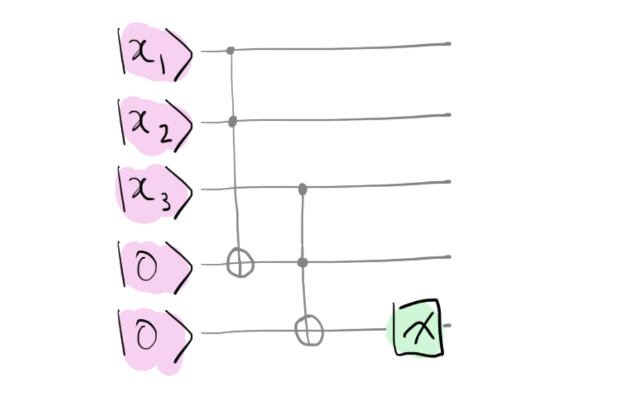

Measuring the last qubit in the computational basis gives $\vert (x_1 \cdot x_2 \cdot x_3)\rangle$ with probability $1$, where $x_1 \cdot x_2 \cdot x_3$ indicates the *product* of classical bits $x_1$, $x_2$, and $x_3.$
There is a Toffoli cascade acting on $5$ input qubits (and with four auxiliary qubits) that Zenda and Reece can use, as well as some Pauli $X$ gates.
All are subject to *depolarizing noise*, such that after each gate, the state on each qubit is replaced with something random with probability $\lambda.$

Your task: use noisy Toffoli cascades and noisy-Pauli X gates to build
a *quantum radar*, which outputs $\vert g_c\vert^2$, the guard's
attention on Trine's cell.
The guard state will be an input, along with four auxiliary qubits
starting in the $\vert 0 \rangle$ state.

## Challenge code

In the code below, you are given various functions:
- `noisy_PauliX`: which applies the Pauli-X gate and then a layer of depolarizing noise with parameter `lmbda`. (The noise is added for you.)
- `Toffoli_cascade`: a cascade of noisy Toffoli gates (noise parameter
  `lmbda`) which help compute a product, as in the circuit pictured above, with the input qubits on `in_wires` and auxiliary system `aux_wires`. (The noise is added for you.)
- `cascadar`: which takes a `guard_state (numpy.tensor)` and returns $|g_c|^2$,
  using noisy equipment with parameter `lmbda`. **You must complete this function**.

### Inputs

The noisy quantum radar `cascadar` takes as input the guard state
`guard_state (numpy.tensor)`, and a noise parameter `lmbda (float)` controlling the depolarizing noise.

### Output

Your `cascadar` function should gives the correct probability
$|g_c|^2$ for test cases, including the effects of noise.

If your solution matches the correct one within the given tolerance
specified in `check` (in this case it's a `1e-4` relative error
tolerance), the output will be `"Correct!"` Otherwise, you will
receive a `"Wrong answer"` prompt.

## Solution

In [4]:
import json
import pennylane as qml
import pennylane.numpy as np

def noisy_PauliX(wire, lmbda):
    """A Pauli-X gate followed by depolarizing noise.

    Args:
        lmbda (float): The parameter defining the depolarizing channel.
        wire (int): The wire the depolarizing channel acts on.
    """
    qml.PauliX(wire)
    qml.DepolarizingChannel(lmbda, wires=wire)

def Toffoli_cascade(in_wires, aux_wires, lmbda):
    """A cascade of noisy Toffolis to help compute the product.
    
    Args:
        in_wires (list(int)): The input qubits.
        aux_wires (list(int)): The auxiliary qubits.
        lmbda (float): The probability of erasing the state of a qubit.
    """
    n = len(in_wires)
    qml.Toffoli(wires=[in_wires[0], in_wires[1], aux_wires[0]])
    qml.DepolarizingChannel(lmbda, wires=in_wires[0])
    qml.DepolarizingChannel(lmbda, wires=in_wires[1])
    qml.DepolarizingChannel(lmbda, wires=aux_wires[0])
    for i in range(n - 2):
        qml.Toffoli(wires=[in_wires[i + 2], aux_wires[i], aux_wires[i + 1]])
        qml.DepolarizingChannel(lmbda, wires=in_wires[i + 2])
        qml.DepolarizingChannel(lmbda, wires=aux_wires[i])
        qml.DepolarizingChannel(lmbda, wires=aux_wires[i + 1])

# Build a quantum radar to check how much attention is on Trine's cell
def cascadar(guard_state, lmbda):
    """Return the squared amplitude |g_c|^2 of the guard state, for c = (1, 1, 0, 0, 1).

    Args:
        guard_state (numpy.tensor): A 2**5 = 32 component vector encoding the guard state.
        lmbda (float): The probability of erasing the state of a qubit.

    Returns:
        (float): The squared amplitude of the guard state on the cell c.
    """
    dev = qml.device("default.mixed", wires = 5 + 4)
    
    @qml.qnode(dev)
    def circuit():
        """
        Circuit that will use the Toffoli_cascade and the noisy_PauliX.
        It will return a measurement on the last qubit.
        """

        qml.QubitStateVector(guard_state, wires = range(5))


        # Put your code here #
        noisy_PauliX(2, lmbda)
        noisy_PauliX(3, lmbda)
        Toffoli_cascade( range(5),  [5,6,7,8], lmbda)
        
        return qml.probs(wires = 8)

    output = circuit()

    # if you want to post-process the output, put code here also #
    print(np.abs(output[1]))

    return np.square(np.abs(output[1]))


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:

    guard_state, lmbda = json.loads(test_case_input)
    output = cascadar(guard_state, lmbda)

    return str(output)

def check(solution_output: str, expected_output: str) -> None:

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-4
    ), "Your quantum radar isn't quite working properly!"


test_cases = [['[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0.0]', '0.64']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0.0]'...
0.6400000000000001


AssertionError: Your quantum radar isn't quite working properly!

# 300 Points

### Backstory

Now Zenda and Reece know where Trine is in hyperjail, and how to evade
the quantum guard who patrols the hypercube.
The only question is how to get there!
Doc Trine's journal explains that the portal to hyperjail is held open by exotic
matter, and the quantum sensor not only helps avoid the guard, but can
be used to detect this matter!
But the galaxy is a big place.
How do Zenda and Reece find the entrance to hyperjail?

Thankfully, they stumble onto a section of Trine's journal entitled
'How to build a robot swarm'.
This not only directs them to an old storage cupboard with hundreds of
jetpack-equipped robots, but instructions for coordinating them using a special entangled state.
Zenda and Reece need to search the office and see if this state can be
found!
There are several mysterious boxes which, at the push of a button,
output a quantum state $\rho.$
Zenda and Reece would like to figure out if any of these states will do.
Unfortunately, noise makes it harder to tell what the states are!

### Blurry shadows

Whenever Zenda and Reece push the button on a box and output a state in order to test it, it goes into a noisy circuit, where each qubit is subject to [depolarizing noise](https://docs.pennylane.ai/en/stable/code/api/pennylane.DepolarizingChannel.html), $\Delta_\lambda.$ If $\rho$ is a single-qubit density matrix, $\Delta_\lambda$ is defined by

$$
\Delta_\lambda [\rho] = (1 - \lambda)\rho + \frac{\lambda}{2}I,
$$

and with probability $\lambda$, the state is deleted and replaced with something random.
Zenda and Reece suspect that noisy is making the states coming out of the box very hard to distinguish from random, and would like some way to test just how badly blurred they are.

To explore this, we first note that any density matrix on $n$ qubits can be written as a linear combination of a special set of "Pauli" density matrices. These have the form

$$
\rho_P = \frac{1}{2^n}(I + P),
$$

where $P \in \\{I, X, Y, Z\\}^{\otimes n}$ is a tensor product of $n$ single-qubit Pauli operators, called a [Pauli word](https://docs.pennylane.ai/en/stable/code/qml_pauli.html). We'll let $\rho_P(\lambda) = \Delta_\lambda^{\otimes n}[\rho_P]$ label the result of applying a layer of depolarizing noise to the Pauli density $\rho_P.$

If adding noise makes a Pauli density matrix look random, a combination of Pauli densities — in other words, any matrix! — will look random. Here, "looks random" means "the expectation of any measurement is similar to the maximally mixed density matrix $\rho_0 = I/2^n$".
Remarkably, we can capture all expectations at once using something called *trace
distance* between density matrices. This is defined as

$$
T(\rho, \sigma) = \frac{1}{2}\text{Tr}|\rho-\sigma|,
$$

where $|A| = \sqrt{A^\dagger A}$ for a generic matrix $A$ (to calculate $|\rho-\sigma|$ you will be provided with the function `abs_dist`).
For any (projective) measurement $M$, the trace distance between two density matrices $\rho$ and $\sigma$ bounds the difference in expectations:

$$
\langle M\rangle_\rho - \langle M\rangle_\sigma = \text{Tr}[M(\rho -\sigma)] \leq T(\rho, \sigma).
$$

If the trace distance is small, the two states are hard to tell apart with *any* measurement.

Zenda and Reece suspect that the noise in their circuitry is blurring the states and making them hard to distinguish.
Your goal is to write a function which verifies the bound

$$
T(\rho_P(\lambda), \rho_0) \leq (1 - \lambda)^{|P|},
$$

by computing the difference between the right-hand side and left-hand side, where $|P|$ is the number of **non-identity** operators in the Pauli word $P.$ You should find this is always positive! Since a Pauli density matrix gets *exponentially* blurry, and all states can be built from these Pauli densities, most states will be exponentially hard to distinguish.


## Challenge code

In the code below, you are given various functions:
- `word_dist`: which counts the number of non-identity operators in a
  Pauli word.
- `abs_dist`: which computes the distance $\vert \rho - \sigma \vert$ between density matrices (`rho` and `sigma`).
- `noisy_Pauli_density`: a helper subcircuit which produces the density matrix $\rho_P$
  associated with a Pauli word $P$ (`word`) and applies depolarizing
  noise to each qubit with parameter `lmbda`. It is merely a
  collection of gates, and should not return anything. **You must complete this function**.
- `maxmix_trace_dist`: a helper function which calculates the trace distance
  $T(\rho_P(\lambda), \rho_0)$, from the noisy
  $\rho_Q$ (specified by `word` and `lmbda`) to the maximally mixed
  density $\rho_0.$ **You must complete this function**.
- `bound_verifier`: a function which computes the difference
$$(1-\lambda)^{|P|} - T(\rho_P(\lambda), \rho_0),$$ with both terms specified by `lmbda` and `P`. **You must complete this function**.

### Inputs

The functions `noisy_Pauli_density`, `maxmix_trace_dist` and `bound_verifier` take as input a
Pauli word  (`word (str)`) represented as a string of characters `I`,
`X`, `Y` and `Z`, and a noise parameter `lmbda (float)` giving
probability of erasing the state of a qubit.

Note that, for `noisy_Pauli_density`, you are working with the
`default.mixed` device and can create a density matrix using
[`qml.QubitDensityMatrix`](https://docs.pennylane.ai/en/stable/code/api/pennylane.QubitDensityMatrix.html).

### Output

Your function `bound_verifier` must correctly compute the difference between the upper bound $(1 - \lambda)^{|P|}$ and the trace distance $T(\rho_P(\lambda), \rho_0)$ on test cases.

If your solution matches the correct one within the given tolerance
specified in `check` (in this case it's a `1e-4` relative error
tolerance), the output will be `"Correct!"` Otherwise, you will
receive a `"Wrong answer"` prompt.

## Solution

In [5]:
import json
import pennylane as qml
import pennylane.numpy as np
import scipy

def abs_dist(rho, sigma):
    """A function to compute the absolute value |rho - sigma|."""
    polar = scipy.linalg.polar(rho - sigma)
    return polar[1]

def word_dist(word):
    """A function which counts the non-identity operators in a Pauli word"""
    return sum(word[i] != "I" for i in range(len(word)))


# Produce the Pauli density for a given Pauli word and apply noise

def noisy_Pauli_density(word, lmbda):
    """
       A subcircuit which prepares a density matrix (I + P)/2**n for a given Pauli
       word P, and applies depolarizing noise to each qubit. Nothing is returned.

    Args:
            word (str): A Pauli word represented as a string with characters I,  X, Y and Z.
            lmbda (float): The probability of replacing a qubit with something random.
    """


    # Put your code here #
    n = len(word)
    pr = 
    for el in range(1,n):
        
    qml.QubitDensityMatrix(state, wires=range(n))
    

# Compute the trace distance from a noisy Pauli density to the maximally mixed density

def maxmix_trace_dist(word, lmbda):
    """
       A function compute the trace distance between a noisy density matrix, specified
       by a Pauli word, and the maximally mixed matrix.

    Args:
            word (str): A Pauli word represented as a string with characters I, X, Y and Z.
            lmbda (float): The probability of replacing a qubit with something random.

    Returns:
            float: The trace distance between two matrices encoding Pauli words.
    """


    # Put your code here #
    return


def bound_verifier(word, lmbda):
    """
       A simple check function which verifies the trace distance from a noisy Pauli density
       to the maximally mixed matrix is bounded by (1 - lambda)^|P|.

    Args:
            word (str): A Pauli word represented as a string with characters I, X, Y and Z.
            lmbda (float): The probability of replacing a qubit with something random.

    Returns:
            float: The difference between (1 - lambda)^|P| and T(rho_P(lambda), rho_0).
    """


    # Put your code here #
    return


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:

    word, lmbda = json.loads(test_case_input)
    output = np.real(bound_verifier(word, lmbda))

    return str(output)


def check(solution_output: str, expected_output: str) -> None:

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-4
    ), "Your trace distance isn't quite right!"


test_cases = [['["XXI", 0.7]', '0.0877777777777777'], ['["XXIZ", 0.1]', '0.4035185185185055'], ['["YIZ", 0.3]', '0.30999999999999284'], ['["ZZZZZZZXXX", 0.1]', '0.22914458207245006']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

SyntaxError: invalid syntax (<ipython-input-5-8936e559cf38>, line 31)